### AR & MA Models
In time series, autoregression(AR) and moving average (MA) models provide a simple description of a process in terms of two factors--one for autoregression and the other for moving average. The AR part entails regressing the variable on its own lagged values. The idea is that the previous time period's value can help us predict the current time period's value. The MA part involves modeling the error term as a linear combination of error terms occurring at the same time step and at various times in the past.

### Autoregressive Models
Autoregressive (AR) Model is when present value of a time series can be predicted from using previous values of the same series. It's a regression using its same series, though shifted by a time step, called a lag. The present value is a weighted average of its past values. Both the t-1 and t-2 are lags of the time series y. The error term (noise) is represented as e. The values a1 and a2 are the coefficients of the model.

AR(1) model: $y_{t}$ = $a_{1}$$y_{t-1}$ + $e_{t}$

AR(2) model: $y_{t}$ = $a_{1}$$y_{t-1}$ + $a_{2}$$y_{t-2}$ + $e_{t}$

We typically represent the order of the model as p for an AR model such as AR(p).

### Moving Average Models
Moving average (MA) is a process where the present value of a time series, y, is defined as a linear combination of past errors. The error term (noise) is represented as e. Both the t-1 and t-2 are lags of the time on the errors.

MA(1) model: $y_{t}$ = $m_{1}$$e_{t-1}$ + $e_{t}$

MA(2) model: $y_{t}$ = $m_{1}$$e_{t-1}$ + $m_{2}$$e_{t-2}$ + $e_{t}$

We typically represent the order of the model as q for a MA model such as MA(q).

### ARMA Models
We can combine both Autoregressive and Moving Average models together to create an ARMA model. The time series is regressed on the previous values and the previous errors.

ARMA(1,1) model: $y_{t}$ = $a_{1}$$y_{t-1}$ + $m_{1}$$e_{t-1}$

For ARMA(p, q), p is the order of the AR process and q is the order of the MA process.

## Forecast quality metrics

Before we begin forecasting, let's understand how to measure the quality of our predictions and take a look at the most commonly used metrics.

- [R squared](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination): coefficient of determination (in econometrics, this can be interpreted as the percentage of variance explained by the model), $(-\infty, 1]$

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ 

```python
sklearn.metrics.r2_score
```
---
- [Mean Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error): this is an interpretable metric because it has the same unit of measurment as the initial series, $[0, +\infty)$

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$ 

```python
sklearn.metrics.mean_absolute_error
```
---
- [Median Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error): again, an interpretable metric that is particularly interesting because it is robust to outliers, $[0, +\infty)$

$MedAE = median(|y_1 - \hat{y}_1|, ... , |y_n - \hat{y}_n|)$

```python
sklearn.metrics.median_absolute_error
```
---
- [Mean Squared Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): the most commonly used metric that gives a higher penalty to large errors and vice versa, $[0, +\infty)$

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

```python
sklearn.metrics.mean_squared_error
```
---
- [Mean Squared Logarithmic Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error): practically, this is the same as MSE, but we take the logarithm of the series. As a result, we give more weight to small mistakes as well. This is usually used when the data has exponential trends, $[0, +\infty)$

$MSLE = \frac{1}{n}\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$

```python
sklearn.metrics.mean_squared_log_error
```
---
- Mean Absolute Percentage Error: this is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model to management, $[0, +\infty)$

$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

### Analítica
Vamos a utilizar los datos de ventas de Johnson&Johnson

In [1]:
# librerias
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

#from pmdarima.arima import auto_arima
#from pmdarima.arima import ARIMA
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/jj.csv', index_col=0)
print(len(data))
data.tail()

84


,data
date,
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


<AxesSubplot:xlabel='date'>

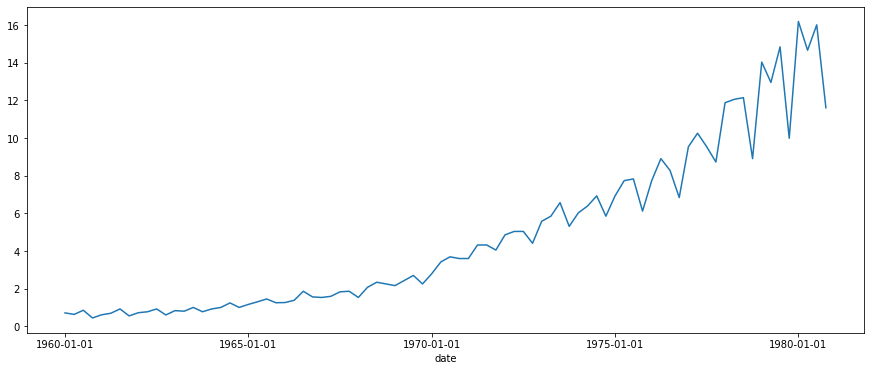

In [4]:
data['data'].plot(figsize=(15,6))

Se aprecia en la gráfica que presenta diferentes estadísticos a lo largo del tiempo.

Representamos sus gráficas de autocorrelación. Vemos que tenemos muy complicado determinar el orden p y q, de cara al modelo ARIMA.

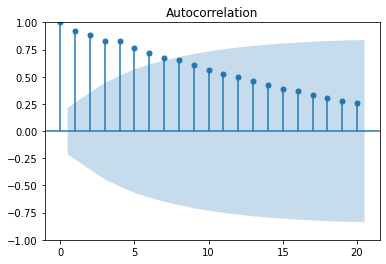

In [5]:
plot_acf(data['data']);

Dividimos en train y test

In [6]:
X = data['data'].values

train= X[:70]
test = X[70:]

In [7]:
test

array([ 9.54    ,  8.729999, 11.88    , 12.06    , 12.15    ,  8.91    ,
       14.04    , 12.96    , 14.85    ,  9.99    , 16.2     , 14.67    ,
       16.02    , 11.61    ])

In [8]:
len(train), len(test)

(70, 14)

## Autoregressive
Tendremos que encontrar el orden de autoregression que mejor encaje con nuestros datos.

In [9]:
model_ar = ARIMA(train, order=(1,0,0))
model_ar_fit = model_ar.fit()

In [12]:
forecast = model_ar_fit.forecast()
print(forecast)
predictions = model_ar_fit.predict(start=70,end=70+13)
print(predictions)
print('MSE:',mean_squared_error(test,predictions))

[10.18960048]
[10.18960048 10.12010762 10.05150973  9.9837953   9.91695294  9.85097143
  9.78583967  9.72154673  9.6580818   9.59543421  9.53359344  9.4725491
  9.41229094  9.35280882]
MSE: 13.699190818977971


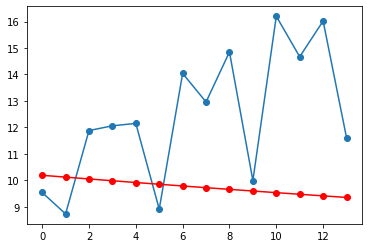

In [13]:
plt.plot(test,'o-')
plt.plot(predictions,'o-',color='red')

No parece que de buen resultado el AR(1). Probemos diferentes lags, a ver cuál sería el mejor

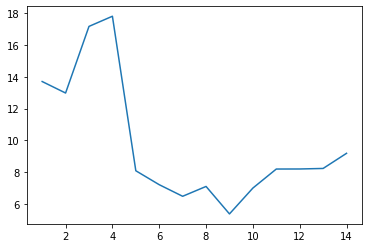

In [14]:
lags=[]
mse=[]

for lag in range(1,15):
    model_ar = ARIMA(train, order=(lag,0,0))
    model_ar_fit = model_ar.fit()
    lags.append(lag)
    predictions = model_ar_fit.predict(70,70+13)
    mse.append(mean_squared_error(test,predictions))
    
plt.plot(lags,mse);    

MSE: 5.36537265651823


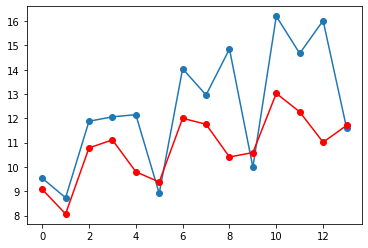

In [15]:
model_ar = ARIMA(train,order=(9,0,0))
model_ar_fit = model_ar.fit()

predictions = model_ar_fit.predict(start=70,end=70+13)
print("MSE:",mean_squared_error(test,predictions))

plt.plot(test,'o-')
plt.plot(predictions,'o-',color='red')

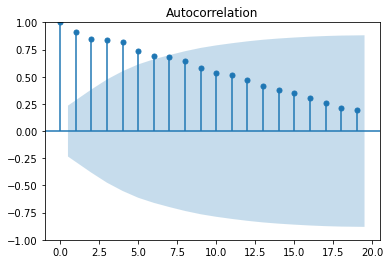

In [16]:
plot_acf(train);

In [17]:
print(model_ar_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:                 ARIMA(9, 0, 0)   Log Likelihood                 -18.427
Date:                Fri, 01 Apr 2022   AIC                             58.853
Time:                        20:47:51   BIC                             83.587
Sample:                             0   HQIC                            68.678
                                 - 70                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7585      8.246      0.698      0.485     -10.403      21.920
ar.L1          0.5717      0.127      4.514      0.000       0.323       0.820
ar.L2          0.0081      0.143      0.057      0.9

## Moving Average
En este caso tendremos en cuenta los errores. El problema es que si tenemos muchos errores al principio, los iremos arrastrando durante las predicciones.

In [18]:
model_ma = ARIMA(train,order=(0,0,1))
model_ma_fit = model_ma.fit()

In [19]:
predictions = model_ma_fit.predict(70,70+13)
print('MSE:',mean_squared_error(test,predictions))

MSE: 87.15680720025182


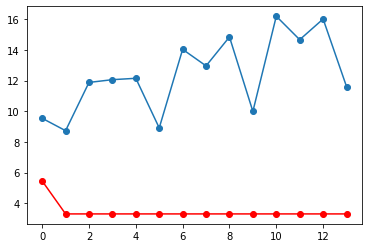

In [20]:
plt.plot(test,'o-')
plt.plot(predictions,'o-',color='red');

No está dando buen resultado. Probaremos entonces varios lags

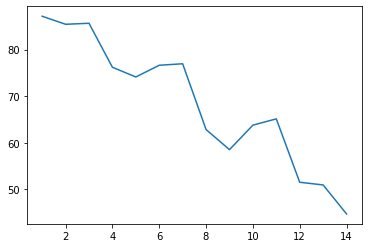

In [21]:
lags = []
mse = []
for lag in range(1, 15):
    try:
        model_ma = ARIMA(train,order=(0, 0, lag))
        model_ma_fit = model_ma.fit()
        predictions = model_ma_fit.predict(70,70+13)
        mse.append(mean_squared_error(test, predictions))
        lags.append(lag)
    except:
        continue
    
plt.plot(lags, mse);

Parece que según vamos aumentando el parámetro `q` del modelo Moving Average, va disminuyendo el error, pero aun así es bastante grande.

## ARIMA
En el arima no solo influyen los parámetros `p` y `q`, sino que también tendremos en cuenta `d`. Parametro con el que diferenciaremos la serie y conseguiremos que sea estacionaria.

Ahora bien, ¿cuál es la mejor combinación de parámetros? Tendremos que realizar varias pruebas. Para comparar los modelos se suele utilizar el AIC.

### AIC
Akaike’s Information Criterion

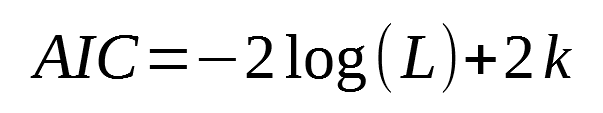

k es el número de parámetros del modelo estadístico y L es el máximo valor de la función de verosimilitud para el modelo estimado. La función de verosimilitud permite realizar inferencias a partir de u conjunto de observaciones.

Se utiliza para seleccionar el mejor modelo, que será el que tiene menor AIC. El AIC depende mucho de cada dato, y es una medida de comparación entre modelos, no de presentación de resultados. Un AIC bajo no quiere decir que el modelo sea muy bueno. Por tanto, AIC no nos dice nada sobre la calidad del modelo en terminos absolutos.


#### ¿Cómo conseguir los mejores p, d, q?

In [24]:
import itertools

p = range(0,5)
d = range(0,5)
q = range(0,5)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [27]:
results = []
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        results.append((param,model_arima_fit.aic))
    except:None

In [28]:
resultados_df = pd.DataFrame(results,columns=['ARIMA params','AIC']).sort_values('AIC')
resultados_df

,ARIMA params,AIC
87,"(3, 2, 2)",42.672859
107,"(4, 1, 2)",43.892402
111,"(4, 2, 1)",43.999910
114,"(4, 2, 4)",44.146785
89,"(3, 2, 4)",44.194711
...,...,...
1,"(0, 0, 1)",274.442656
70,"(2, 4, 0)",284.291612
45,"(1, 4, 0)",288.931992
20,"(0, 4, 0)",334.301184


Ya tenemos la mejor combinación de parámetros para el ARIMA. Probemos el modelo

In [29]:
best_model = ARIMA(train, order=(3,2,2))
best_model_fit = best_model.fit()
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:                 ARIMA(3, 2, 2)   Log Likelihood                 -15.336
Date:                Fri, 01 Apr 2022   AIC                             42.673
Time:                        20:57:41   BIC                             55.990
Sample:                             0   HQIC                            47.949
                                 - 70                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0958      0.050    -22.034      0.000      -1.193      -0.998
ar.L2         -1.0945      0.044    -24.936      0.000      -1.181      -1.008
ar.L3         -0.9453      0.050    -18.923      0.0

In [30]:
predictions = best_model_fit.predict(start=70,end=70+13)
print(mean_squared_error(test,predictions))

4.794100418791983


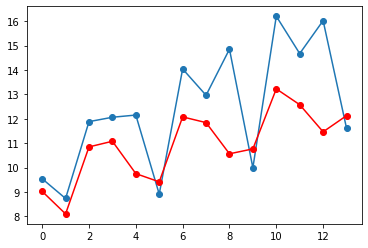

In [31]:
plt.plot(test,'o-')
plt.plot(predictions,'o-',color='red')

## ARIMAX
La X viene de exogenous. Significa que le podemos añadir una variable externa con la que entrenar el modelo.

Vamos a probar con los datos de la bolsa. Primero un auto_arima con los datos a cierre. Y después un auto_arima acompañado de los datos de apertura de bolsa, a ver cuánto ayudan a predecir el cierre.

In [32]:
stock_df = pd.read_csv('data/FB.csv', header=0, index_col=0)
print(len(stock_df))
stock_df.head()

1259


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


<AxesSubplot:xlabel='Date'>

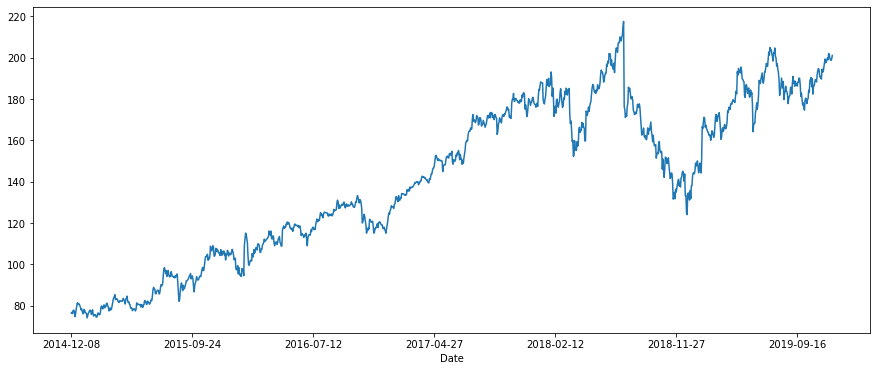

In [33]:
stock_df['Close'].plot(figsize=(15,6))

Vemos primero ejemplo sin variable exogena

In [35]:
train = stock_df['Close'][0:1240].values
test = stock_df['Close'][1240:].values
print(len(train),len(test))

1240 19


Vamos a probar varios ARIMAS, a ver cuál sería la mejor combinación de hiperparámetros.

In [38]:
p = range(0,3)
d = range(0,3)
q = range(0,3)

pdq = list(itertools.product(p, d, q))
pdq

results = []
for param in pdq:
    model_arima = ARIMA(train,order=param)
    model_arima_fit = model_arima.fit()
    results.append((param,model_arima_fit.aic))
    
resultados_df = pd.DataFrame(results, columns=['ARIMA params', 'AIC']).sort_values('AIC')
resultados_df.head()

,ARIMA params,AIC
13,"(1, 1, 1)",5973.656388
23,"(2, 1, 2)",5974.116092
3,"(0, 1, 0)",5975.049485
22,"(2, 1, 1)",5975.326271
14,"(1, 1, 2)",5975.344216


Ya lo tenemos, ahora montaremos el modelo con esos hiperparámetros

In [39]:
model = ARIMA(train, order=(1,1,1))
model.fit()
print(model.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2983.828
Date:                Fri, 01 Apr 2022   AIC                           5973.656
Time:                        21:06:41   BIC                           5989.023
Sample:                             0   HQIC                          5979.436
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8516      0.107      7.964      0.000       0.642       1.061
ma.L1         -0.8862      0.095     -9.280      0.000      -1.073      -0.699
sigma2         7.2326      0.077     94.156      0.0

In [40]:
predictions = model.fit().predict(start=1240, end=1240+18)
mean_squared_error(test,predictions)

60.52953430685333

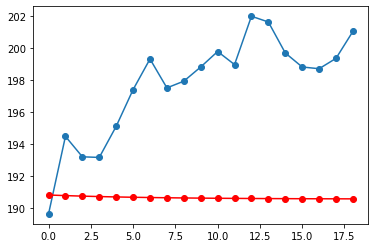

In [41]:
plt.plot(test,'o-')
plt.plot(predictions,'o-',color='red');

Vamos ahora a compararlo con el mismo modelo, pero en este caso le añadimos una variable exogena al entrenamiento

In [43]:
model = ARIMA(train, exog=stock_df['Open'][:1240], order=(1,1,1))
print(model.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2601.785
Date:                Fri, 01 Apr 2022   AIC                           5211.570
Time:                        21:10:38   BIC                           5232.058
Sample:                             0   HQIC                          5219.275
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.9994      0.002    503.871      0.000       0.996       1.003
ar.L1         -0.1305      0.023     -5.565      0.000      -0.176      -0.085
ma.L1         -1.0000      0.419     -2.388      0.0

Reduce bastante el AIC

In [44]:
predictions = model.fit().predict(1240,1240+18, exog=stock_df['Open'][1240:])
mean_squared_error(test,predictions)

2.7043943224030627

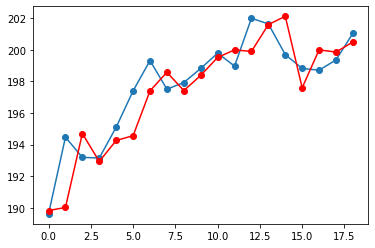

In [45]:
plt.plot(test,'o-')
plt.plot(predictions.values,'o-',color='red');

In [46]:
p = range(0,3)
d = range(0,3)
q = range(0,3)

pdq = list(itertools.product(p, d, q))
pdq

results = []
for param in pdq:
    model_arima = ARIMA(train,exog=stock_df['Open'][:1240],order=param) # podemos usar más variable exógenas
    model_arima_fit = model_arima.fit()
    results.append((param,model_arima_fit.aic))
    
resultados_df = pd.DataFrame(results, columns=['ARIMA params', 'AIC']).sort_values('AIC')
resultados_df.head()

,ARIMA params,AIC
1,"(0, 0, 1)",5205.828568
19,"(2, 0, 1)",5206.190752
10,"(1, 0, 1)",5206.205513
2,"(0, 0, 2)",5206.656830
18,"(2, 0, 0)",5207.398229


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2598.914
Date:                Fri, 01 Apr 2022   AIC                           5205.829
Time:                        21:13:33   BIC                           5226.320
Sample:                             0   HQIC                          5213.535
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1636      0.239      0.683      0.494      -0.306       0.633
Open           0.9991      0.001    672.318      0.000       0.996       1.002
ma.L1         -0.1420      0.024     -5.829      0.0

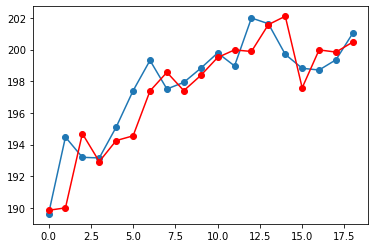

In [47]:
model = ARIMA(train,exog=stock_df['Open'][:1240],order=(0,0,1))
print(model.fit().summary())

predictions = model.fit().predict(1240,1240+18, exog=stock_df['Open'][1240:])
print("mean_squared_error:", mean_squared_error(test, predictions))

plt.plot(test,'o-')
plt.plot(predictions.values,'o-',color='red');

## SARIMA
Veamos cómo podemos predecir con datos que tienen estacionalidad, es decir, que cuentan con un patrón que se repite a lo largo del tiempo.

Probemos el arima sin indicarle que hay componente de seasonality

Ahora le añadimos el componente seasonality mediante el parametro `s`.